In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline


## 1. UNDERSTANDING THE BUSINESS
As part of analysing the Stack Overflow 2017 Survey Data I would want to focus on an interesting aspect of the business of Stack Overflow site - What are the different aspects and parameters which impact the satisfaction of the users of this site? This will help the business take decisions about how they can improve the loyalty, increase user base and improve ad revenue. 

Key Questions I would focus upon - 
1. How does StackOverflow Satisfaction levels vary with employment status? Is there an affinity of a particular employment status group? 
2. How does StackOverflow Satisfaction levels vary with activity level on stack overflow?
3. How is the perception of Ads relevance/ disturbance impact the user satisfaction level?
4. Which are the couple of highest impact parameters impacting user satisfaction among all?

## 2. UNDERSTANDING OF THE DATA

In [199]:
# Gather the data

df = pd.read_csv('./survey_results_public.csv')

# Assess the data

print(df.shape)
print(df.info())
df.head()

(51392, 154)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB
None


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
# Continue assessing the data

# What kind information is provied?
df.columns



Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [201]:
# % missing values
df.isnull().sum()/ df.shape[0]*100

Respondent                      0.000000
Professional                    0.000000
ProgramHobby                    0.000000
Country                         0.000000
University                      0.000000
EmploymentStatus                0.000000
FormalEducation                 0.000000
MajorUndergrad                 16.638776
HomeRemote                     14.367995
CompanySize                    24.264477
CompanyType                    24.457114
YearsProgram                    0.480620
YearsCodedJob                  20.435087
YearsCodedJobPast              98.104763
DeveloperType                  29.706958
WebDeveloperType               79.187422
MobileDeveloperType            96.978129
NonDeveloperType               90.484900
CareerSatisfaction             16.922867
JobSatisfaction                21.435243
ExCoderReturn                  98.204001
ExCoderNotForMe                98.207892
ExCoderBalance                 98.204001
ExCoder10Years                 98.215676
ExCoderBelonged 

## 3. DATA PREPARATION

In [202]:
# Drop unused columns
columns_to_drop = ['Respondent' , 'Professional' , 'ProgramHobby' , 'Country' , 'University' , 
                   'FormalEducation' , 'MajorUndergrad' , 'HomeRemote' , 
                   'CompanySize' , 'CompanyType' , 'YearsProgram' , 'YearsCodedJob' , 
                   'YearsCodedJobPast' , 'DeveloperType' , 'WebDeveloperType' , 'MobileDeveloperType' , 
                   'NonDeveloperType' , 'CareerSatisfaction' , 'JobSatisfaction' , 'ExCoderReturn' , 
                   'ExCoderNotForMe' , 'ExCoderBalance' , 'ExCoder10Years' , 'ExCoderBelonged' , 
                   'ExCoderSkills' , 'ExCoderWillNotCode' , 'ExCoderActive' , 'PronounceGIF' , 
                   'ProblemSolving' , 'BuildingThings' , 'LearningNewTech' , 'BoringDetails' , 
                   'JobSecurity' , 'DiversityImportant' , 'AnnoyingUI' , 'FriendsDevelopers' , 
                   'RightWrongWay' , 'UnderstandComputers' , 'SeriousWork' , 'InvestTimeTools' , 
                   'WorkPayCare' , 'KinshipDevelopers' , 'ChallengeMyself' , 'CompetePeers' , 
                   'ChangeWorld' , 'JobSeekingStatus' , 'HoursPerWeek' , 'LastNewJob' , 
                   'AssessJobIndustry' , 'AssessJobRole' , 'AssessJobExp' , 'AssessJobDept' , 
                   'AssessJobTech' , 'AssessJobProjects' , 'AssessJobCompensation' , 'AssessJobOffice' , 
                   'AssessJobCommute' , 'AssessJobRemote' , 'AssessJobLeaders' , 'AssessJobProfDevel' , 
                   'AssessJobDiversity' , 'AssessJobProduct' , 'AssessJobFinances' , 'ImportantBenefits' , 
                   'ClickyKeys' , 'JobProfile' , 'ResumePrompted' , 'LearnedHiring' , 
                   'ImportantHiringAlgorithms' , 'ImportantHiringTechExp' , 
                   'ImportantHiringCommunication' , 'ImportantHiringOpenSource' , 
                   'ImportantHiringPMExp' , 'ImportantHiringCompanies' , 'ImportantHiringTitles' , 
                   'ImportantHiringEducation' , 'ImportantHiringRep' , 'ImportantHiringGettingThingsDone' , 
                   'Currency' , 'Overpaid' , 'TabsSpaces' , 'EducationImportant' , 'EducationTypes' , 
                   'SelfTaughtTypes' , 'TimeAfterBootcamp' , 'CousinEducation' , 'WorkStart' , 
                   'HaveWorkedLanguage' , 'WantWorkLanguage' , 'HaveWorkedFramework' , 
                   'WantWorkFramework' , 'HaveWorkedDatabase' , 'WantWorkDatabase' , 'HaveWorkedPlatform' , 
                   'WantWorkPlatform' , 'IDE' , 'AuditoryEnvironment' , 'Methodology' , 
                   'VersionControl' , 'CheckInCode' , 'ShipIt' , 'OtherPeoplesCode' , 
                   'ProjectManagement' , 'EnjoyDebugging' , 'InTheZone' , 'DifficultCommunication' , 
                   'CollaborateRemote' , 'MetricAssess' , 'EquipmentSatisfiedMonitors' , 
                   'EquipmentSatisfiedCPU' , 'EquipmentSatisfiedRAM' , 'EquipmentSatisfiedStorage' , 
                   'EquipmentSatisfiedRW' , 'InfluenceInternet' , 'InfluenceWorkstation' , 
                   'InfluenceHardware' , 'InfluenceServers' , 'InfluenceTechStack' , 
                   'InfluenceDeptTech' , 'InfluenceVizTools' , 'InfluenceDatabase' , 
                   'InfluenceCloud' , 'InfluenceConsultants' , 'InfluenceRecruitment' , 
                   'InfluenceCommunication' , 'Gender' , 'HighestEducationParents' , 'Race' , 
                   'SurveyLong' , 'QuestionsInteresting' , 'QuestionsConfusing' , 'InterestedAnswers' ,
                   'Salary' , 'ExpectedSalary', 'StackOverflowDevices']

df.drop(columns_to_drop, axis=1, inplace=True)
df.head()

,EmploymentStatus,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney
0,"Not employed, and not looking for work",I have created a CV or Developer Story on Stac...,9.0,At least once each week,Haven't done at all,Once or twice,Haven't done at all,Haven't done at all,Several times,Several times,Once or twice,Somewhat agree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree
1,Employed part-time,I have created a CV or Developer Story on Stac...,8.0,Several times,Several times,Once or twice,Once or twice,Once or twice,Haven't done at all,Several times,At least once each week,Disagree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree
2,Employed full-time,I have created a CV or Developer Story on Stac...,8.0,Once or twice,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,At least once each day,At least once each day,Disagree,Disagree,Strongly disagree,Strongly agree,Agree,Agree,Agree,Disagree
3,Employed full-time,I have created a CV or Developer Story on Stac...,10.0,At least once each week,Several times,At least once each week,Several times,At least once each week,Several times,At least once each day,At least once each day,Agree,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Agree,Strongly agree,Disagree
4,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0.28798256537982564


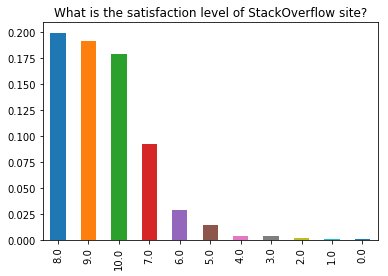

In [203]:
# Explore the StackOverflow Satisfaction Status values

print(df['StackOverflowSatisfaction'].isnull().mean()) # missing values

status_vals = df.StackOverflowSatisfaction.value_counts()#Provide a pandas series of the counts for each Employment status

# The below should be a bar chart of the proportion of individuals in each Employment category if your status_vals
# is set up correctly.

(status_vals/df.shape[0]).plot(kind="bar");
plt.title("What is the satisfaction level of StackOverflow site?");

In [204]:
# Drop rows with missing StackOverflowSatisfaction values
df = df.dropna(subset=['StackOverflowSatisfaction'], axis=0)
df.shape

(36592, 19)

In [205]:
df.describe()

,StackOverflowSatisfaction
count,36592.000000
mean,8.429875
std,1.390635
min,0.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,10.000000


## 4. ANSWER THE BUSINESS QUESTIONS

The business question I have are which all parameters determine the level of satisfaction the users have for Stackoverflow site. To understand that I will explore some features here to see any visible trends.

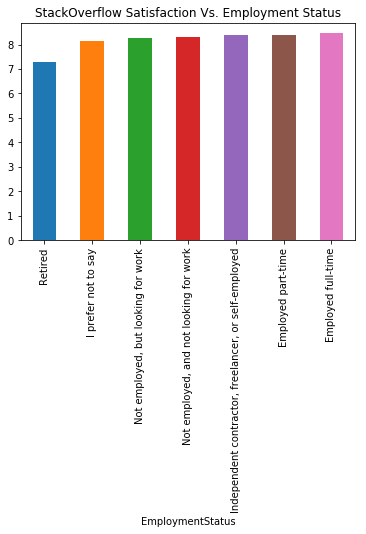

In [215]:
res = df.groupby(['EmploymentStatus']).mean()['StackOverflowSatisfaction'].sort_values().dropna()
res.plot(kind="bar");
plt.title("StackOverflow Satisfaction Vs. Employment Status");

# res = df.groupby(['EmploymentStatus']).median()['StackOverflowSatisfaction'].sort_values().dropna()
# res

**Business Question: How does StackOverflow Satisfaction levels vary with employment status?**

Clearly, The employeed people are more satisfied with (and value!) the stack overflow when compared to those not in employment (volunteerly or otherwise) currently. One of the possible reasons may be the dependence of job holders on Stack overflow for the troubleshooting in their programming assignments.

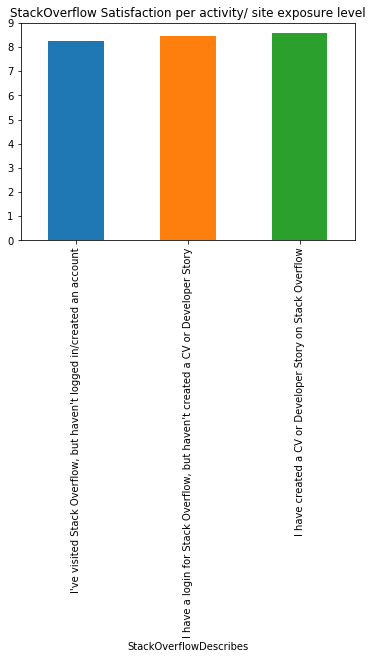

In [217]:
res = df.groupby(['StackOverflowDescribes']).mean()['StackOverflowSatisfaction'].sort_values().dropna()
res.plot(kind="bar");
plt.title("StackOverflow Satisfaction per activity/ site exposure level");

**Business Question: How does StackOverflow Satisfaction levels vary with activity level on stack overflow?**

Those who have created a CV or Developer story of Stackoverflow are more satisfied with it. Possibly because they become better acquainted of the site benefits as they engage in these activities.


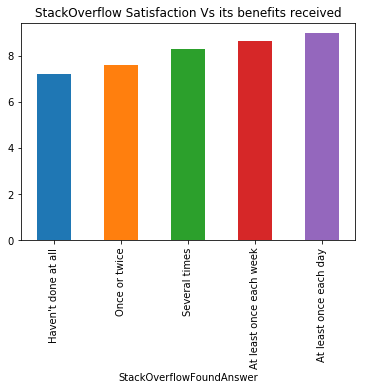

In [218]:
res = df.groupby(['StackOverflowFoundAnswer']).mean()['StackOverflowSatisfaction'].sort_values().dropna()
res.plot(kind="bar");
plt.title("StackOverflow Satisfaction Vs its benefits received");

**Quite Obvious conclusion - more the benefits extracted, more is the satisfaction level...**

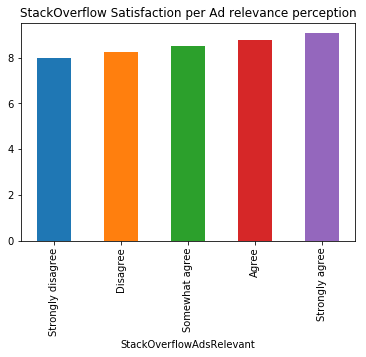

In [186]:
res = df.groupby(['StackOverflowAdsRelevant']).mean()['StackOverflowSatisfaction'].sort_values().dropna()
res.plot(kind="bar");
plt.title("StackOverflow Satisfaction per Ad relevance perception");


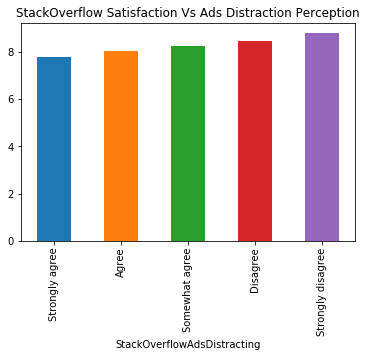

In [187]:
res = df.groupby(['StackOverflowAdsDistracting']).mean()['StackOverflowSatisfaction'].sort_values().dropna()
res.plot(kind="bar");
plt.title("StackOverflow Satisfaction Vs Ads Distraction Perception");

**Business Question: How is the perception of Ads relevance/ disturbance impact the user satisfaction level?**

As expected, the perception of Ads relevance is directly proportional to satisfaction with the site. So best way to increase the Ads revenue and the satisfaction with the site for Stacks Overflow is to focus on the relevance of the ads they choose for their users.**

In [397]:
def plot_satisfaction(group_by_columns):
    '''
    INPUT - List of columns' values you would like to plot the user satisfaction with
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            Plots of user satisfaction against listed columns
    '''

    for i in range(len(group_by_columns)):
        print(i)
        print((group_by_columns)[i])
        res = df.groupby((group_by_columns)[i]).mean()['StackOverflowSatisfaction'].sort_values().dropna()
        print(res)
        fig, axs = plt.subplots(1,2)
        res.plot(kind="bar",subplots=True, ax=axs[0]);
        # print(plt)
        # plt.show
    
    
    return plt
    


0
StackOverflowAdsDistracting
StackOverflowAdsDistracting
Strongly agree       7.811153
Agree                8.055336
Somewhat agree       8.272497
Disagree             8.493136
Strongly disagree    8.803124
Name: StackOverflowSatisfaction, dtype: float64
1
StackOverflowAdsRelevant
StackOverflowAdsRelevant
Strongly disagree    8.000366
Disagree             8.239107
Somewhat agree       8.531698
Agree                8.770597
Strongly agree       9.063898
Name: StackOverflowSatisfaction, dtype: float64
2
StackOverflowFoundAnswer
StackOverflowFoundAnswer
Haven't done at all        7.206785
Once or twice              7.586159
Several times              8.280444
At least once each week    8.644614
At least once each day     8.983520
Name: StackOverflowSatisfaction, dtype: float64
3
StackOverflowDescribes
StackOverflowDescribes
I've visited Stack Overflow, but haven't logged in/created an account             8.237601
I have a login for Stack Overflow, but haven't created a CV or Developer St

<module 'matplotlib.pyplot' from 'C:\\Users\\manishb\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

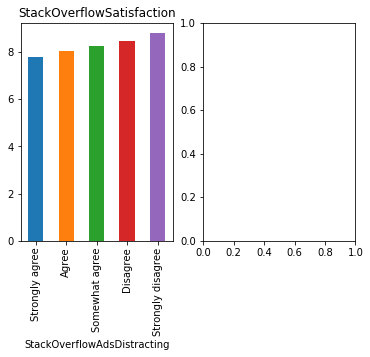

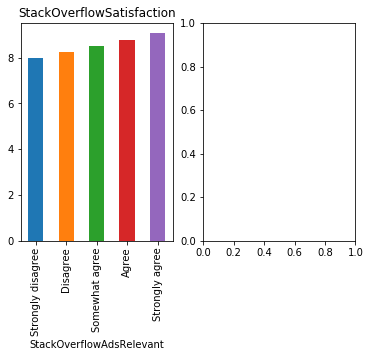

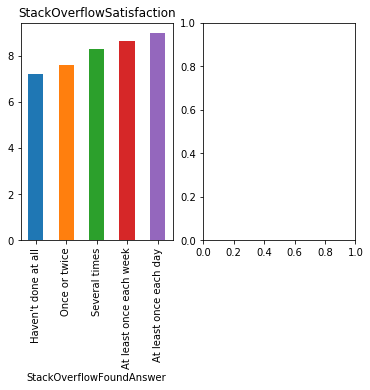

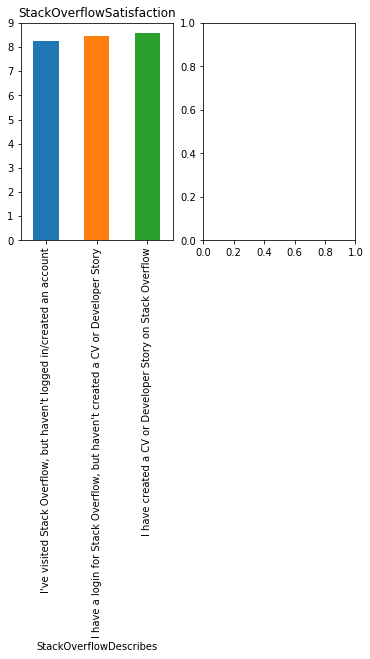

In [398]:
plot_satisfaction(['StackOverflowAdsDistracting','StackOverflowAdsRelevant', 'StackOverflowFoundAnswer', 'StackOverflowDescribes'])

## 5. DATA PREPARATION BEFORE MODELLING

In [188]:
# Remove null values

print(df.shape)
df.dropna(axis=0, how='any', inplace=True)
print(df.shape)

(36592, 19)
(25531, 19)


In [189]:
# One Hot Encoding for categorical features
one_hot_columns = ['EmploymentStatus' , 'StackOverflowDescribes' , 'StackOverflowFoundAnswer' , 'StackOverflowCopiedCode' , 
                   'StackOverflowJobListing' , 'StackOverflowCompanyPage' , 'StackOverflowJobSearch' ,
                   'StackOverflowNewQuestion' , 'StackOverflowAnswer' , 'StackOverflowMetaChat' , 
                   'StackOverflowAdsRelevant' , 'StackOverflowAdsDistracting' , 'StackOverflowModeration' ,
                   'StackOverflowCommunity' , 'StackOverflowHelpful' , 'StackOverflowBetter' , 
                   'StackOverflowWhatDo' , 'StackOverflowMakeMoney']
df = pd.get_dummies(df, columns=one_hot_columns, prefix = one_hot_columns)
df.shape

(25531, 91)

In [190]:
df.head()


,StackOverflowSatisfaction,EmploymentStatus_Employed full-time,EmploymentStatus_Employed part-time,EmploymentStatus_I prefer not to say,"EmploymentStatus_Independent contractor, freelancer, or self-employed","EmploymentStatus_Not employed, and not looking for work","EmploymentStatus_Not employed, but looking for work",EmploymentStatus_Retired,"StackOverflowDescribes_I have a login for Stack Overflow, but haven't created a CV or Developer Story",StackOverflowDescribes_I have created a CV or Developer Story on Stack Overflow,...,StackOverflowWhatDo_Agree,StackOverflowWhatDo_Disagree,StackOverflowWhatDo_Somewhat agree,StackOverflowWhatDo_Strongly agree,StackOverflowWhatDo_Strongly disagree,StackOverflowMakeMoney_Agree,StackOverflowMakeMoney_Disagree,StackOverflowMakeMoney_Somewhat agree,StackOverflowMakeMoney_Strongly agree,StackOverflowMakeMoney_Strongly disagree
0,9.0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,8.0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,8.0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3,10.0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
6,8.0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


## 6. Train model and Measure Model Performance

In [191]:
y = df['StackOverflowSatisfaction']
X = df.drop(['StackOverflowSatisfaction'], axis=1)
X.shape[1]

90

In [192]:
# Split data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
X_train.shape

(17871, 90)

In [193]:
ForestRegressor = RandomForestRegressor(n_estimators=500)
ForestRegressor.fit(X_train, y_train)
y_test_preds = ForestRegressor.predict(X_test)
print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))

0.3481076053755907
1.2791781167032605


In [194]:
coefs_df = pd.DataFrame()

coefs_df['Parameters'] = X_train.columns
coefs_df['Coefs'] = ForestRegressor.feature_importances_
coefs_df.sort_values('Coefs', ascending=False).head(10)

,Parameters,Coefs
78,StackOverflowBetter_Strongly agree,0.142721
75,StackOverflowBetter_Agree,0.052277
63,StackOverflowModeration_Strongly agree,0.032495
73,StackOverflowHelpful_Strongly agree,0.031885
69,StackOverflowCommunity_Strongly disagree,0.029750
66,StackOverflowCommunity_Disagree,0.017323
13,StackOverflowFoundAnswer_Once or twice,0.015654
17,StackOverflowCopiedCode_Haven't done at all,0.015416
18,StackOverflowCopiedCode_Once or twice,0.014603
52,StackOverflowAdsRelevant_Somewhat agree,0.014004


In General the perception of 'Stack Overflow makes the Internet a better place' and 'The answers and code examples I get on Stack Overflow are helpful' have highest impact on user satisfaction over StackOverflow.

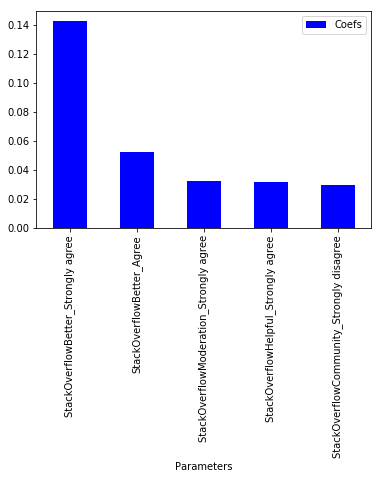

In [195]:
coefs_df.set_index('Parameters', inplace=True)
coefs_df.sort_values('Coefs', ascending=False).head(5).plot(kind='bar', color='blue')

In [399]:
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook 3.8_Perceptron_Algorithm.ipynb to html',
 '[NbConvertApp] Writing 282957 bytes to 3.8_Perceptron_Algorithm.html',
 '[NbConvertApp] Converting notebook 4.16_Entropy.ipynb to html',
 '[NbConvertApp] Writing 276383 bytes to 4.16_Entropy.html',
 '[NbConvertApp] Converting notebook 4.18_DecisionTree.ipynb to html',
 '[NbConvertApp] Writing 287321 bytes to 4.18_DecisionTree.html',
 '[NbConvertApp] Converting notebook 4.19 Titanic Survival Exploration with Decision Trees.ipynb to html',
 '[NbConvertApp] Writing 280616 bytes to 4.19 Titanic Survival Exploration with Decision Trees.html',
 '[NbConvertApp] Converting notebook 5.15_Spam Classifier.ipynb to html',
 '[NbConvertApp] Writing 293717 bytes to 5.15_Spam Classifier.html',
 '[NbConvertApp] Converting notebook BackPropogation.ipynb to html',
 '[NbConvertApp] Writing 290935 bytes to BackPropogation.html',
 '[NbConvertApp] Converting notebook BMI Life Model.ipynb to html',
 '[NbConvertApp] Writing 282094 